# Session assignments
Interactively determines the assignments of presentations to sessions.

## Paths and parameters

In [11]:
# Packages
import make_sessions as ms
import preprocessing as pp
import compile_program as cp
# from IPython.display import display
import pandas as pd

# Set paths
code_root = '/Users/mmchenry/Documents/code/program_officer'
data_root = '/Users/mmchenry/Documents/Projects/program_officer'
mtg_year  = 2024

# Check paths and create directories
source_data_dir, inter_data_dir, output_data_dir = pp.setup_dirs(data_root, code_root, mtg_year)

# Presentations ('talks' or 'posters')
presentation_type = 'talks'

# Abstract data file  (an xlsx file, downloaded from X-CD)
abstract_filename = 'abstracts_123852'

# Division to analyze
division = 'dvm'

# Minimum and maximum number of presentations per session
min_size = 6
max_size = 8

# Load abstracts for requested division and presentation type
df = ms.load_abstracts(inter_data_dir, division, presentation_type=presentation_type)

# Clear out any previous assignments
df['session_num'] = None
df['talk_num'] = None
df['major_branch'] = None

# Settings 
pd.set_option('display.max_colwidth', None)

# Clustering and session making
Creates a phylogeny (i.e., dendrogram) of relationships between talks and defines the major branches, using the distance threshold. 
Each branch is characterized by its top keywords. 
Finally, each branch is divided into sessions of 6-8 talks that are in an optimal order by their keyword ratings.

Fused cluster E with F


,Branch,Number of Talks,Top Keywords
0,A,8,"['ecomorphology', 'fish', 'animal', 'feeding', 'functional_morphology', 'swimming', 'jaws', 'paleontology', 'behavior']"
1,B,16,"['animal', 'functional_morphology', 'skulls', 'jaws', 'feeding', 'ecomorphology', 'paleontology', 'structures', 'teeth']"
2,C,35,"['fish', 'animal', 'functional_morphology', 'ecomorphology', 'swimming', 'structures', 'fluid_dynamics', 'behavior', 'paleontology']"
3,D,34,"['animal', 'functional_morphology', 'ecomorphology', 'paleontology', 'structures', 'skulls', 'behavior', 'feeding', 'sensing']"
4,F,23,"['animal', 'functional_morphology', 'motor_control', 'muscle', 'ecomorphology', 'kinematics', 'behavior', 'walking', 'swimming']"


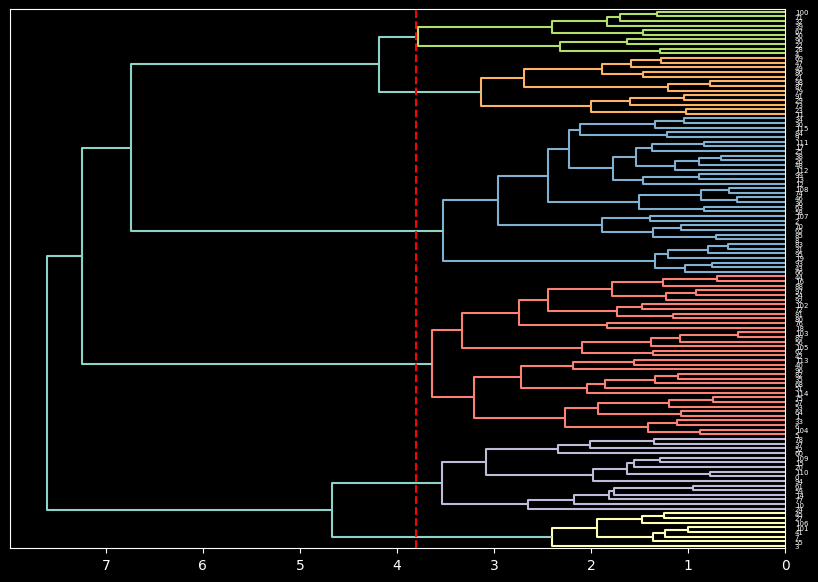

In [12]:
# Run initial clustering
df, distance_threshold = ms.run_hierarchical(df, min_size=min_size, max_size=max_size)

# Summarize the major keywords for each branch
branch_summ = ms.summarize_branch_keywords(df,num_keywords=9)

# Plot dendrogram
ms.plot_dendrogram(df, distance_threshold)

# Create sessions of talks that are similar to each other
df = ms.process_each_branch(df, min_size=min_size, max_size=max_size, echo=False)


## Output divisional program

In [17]:
# Make complete dataframe for the division
df_full = cp.load_div_dataframe(df, source_data_dir, abstract_filename)

# Output divisional schedule to html
cp.render_div_schedule_html(df_full, division, presentation_type, output_data_dir, include_summary=True)

Schedule written to /Users/mmchenry/Documents/Projects/program_officer/output_data/2024/talks_html/dvm.html
